In [36]:
print("Hello world")

Hello world


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [38]:
import warnings
warnings.filterwarnings("ignore")

In [39]:
MallCustomers = pd.read_csv('./Mall_Customers.csv')

In [40]:
MallCustomers

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [41]:
MallCustomers.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [42]:
MallCustomers.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [43]:
MallCustomers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [44]:
MallCustomers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [45]:
MallCustomers['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

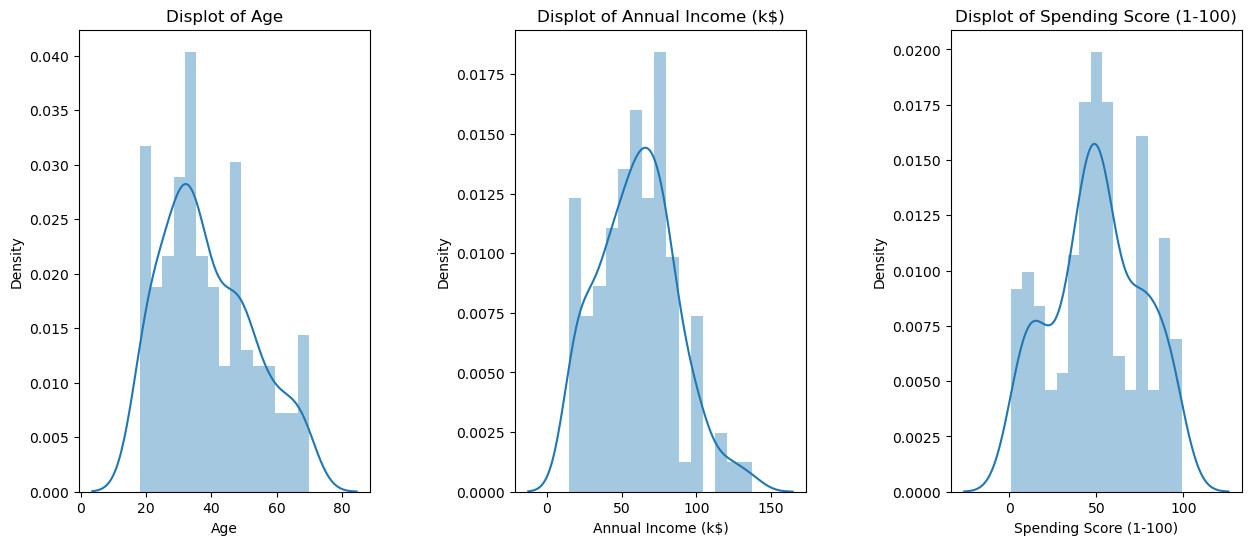

In [46]:
plt.figure(1, figsize=(15, 6))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(MallCustomers[x], bins=15)
    plt.title(f"Displot of {x}")
plt.show()

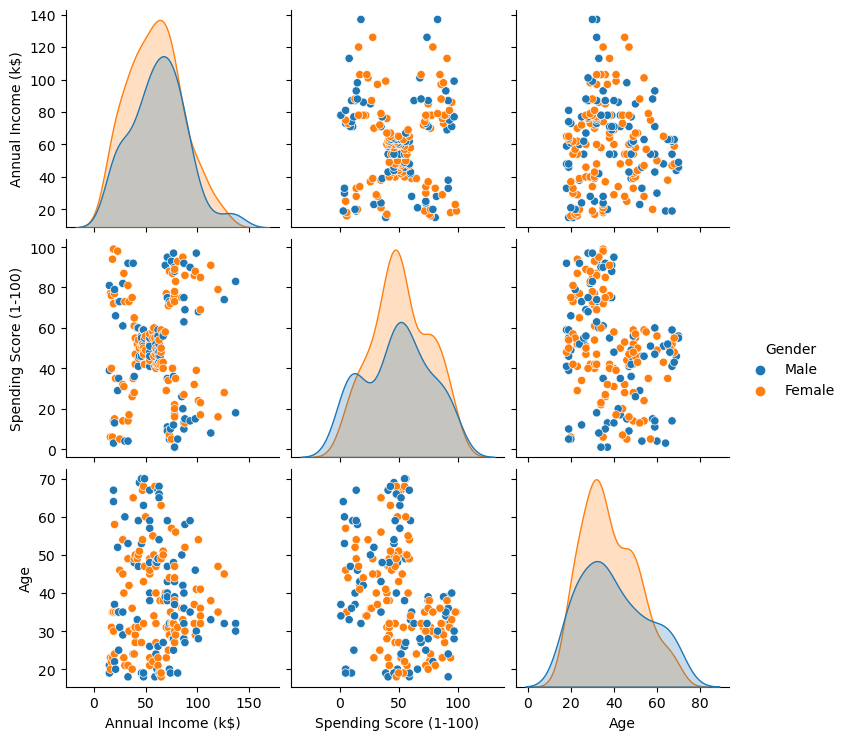

In [47]:
sns.pairplot(data=MallCustomers, vars=["Annual Income (k$)", "Spending Score (1-100)", 'Age'], hue='Gender')
plt.show()

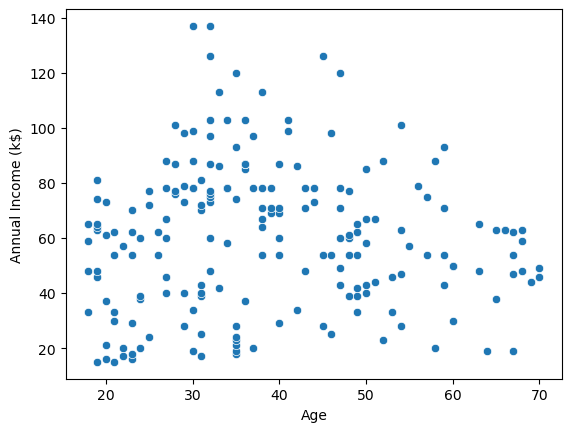

In [48]:
sns.scatterplot(x='Age', y='Annual Income (k$)', data=MallCustomers)
plt.show()

In [49]:
x1 = MallCustomers[['Age', 'Spending Score (1-100)']].iloc[:, :].values

In [50]:
x1

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

In [51]:
inertia = []

In [52]:
from sklearn.cluster import KMeans

In [53]:
for n in range(1, 15):
    algorithm = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=32)
    algorithm.fit(x1)
    inertia.append(algorithm.inertia_)

In [54]:
inertia

[171535.5,
 75949.15601023019,
 45840.67661610867,
 28165.58356662934,
 23810.462233071365,
 19566.522341377608,
 15514.193134351035,
 13088.48481709443,
 11452.382085278557,
 10215.340613417085,
 9431.655434491979,
 8600.366217792252,
 7867.752235532684,
 7217.382141932143]

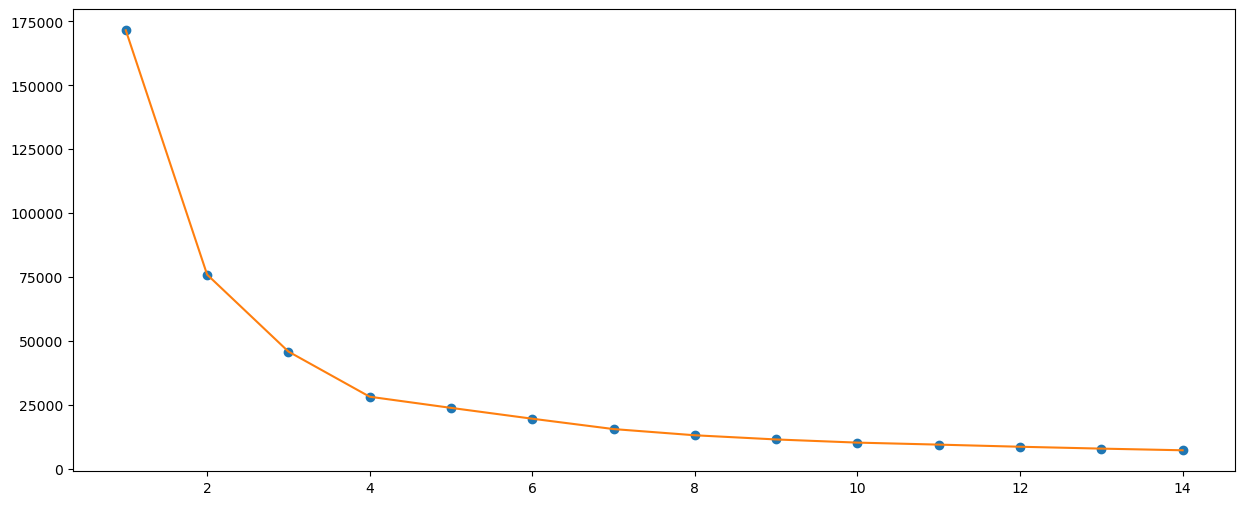

In [55]:
plt.figure(1, figsize=(15, 6))
plt.plot(np.arange(1,15), inertia, 'o')
plt.plot(np.arange(1,15), inertia, '-')
plt.show()

## Number of clusters = 4

In [56]:
algorithm =  KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=32)

In [57]:
algorithm.fit(x1)

KMeans(n_clusters=4, n_init=10, random_state=32)

In [58]:
labels = algorithm.labels_

In [59]:
centroids = algorithm.cluster_centers_

In [60]:
h = 0.02
x_min, x_max = x1[:, 0].min(), x1[:, 0].max()+1
y_min, y_max = x1[:, 0].min(), x1[:, 0].max()+1*h
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

In [61]:
# for i in z:
   # print(i, end=' ')

In [62]:
z = z.reshape(xx.shape)

In [63]:
z

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [2, 2, 2, ..., 3, 3, 3],
       [2, 2, 2, ..., 3, 3, 3],
       [2, 2, 2, ..., 3, 3, 3]])

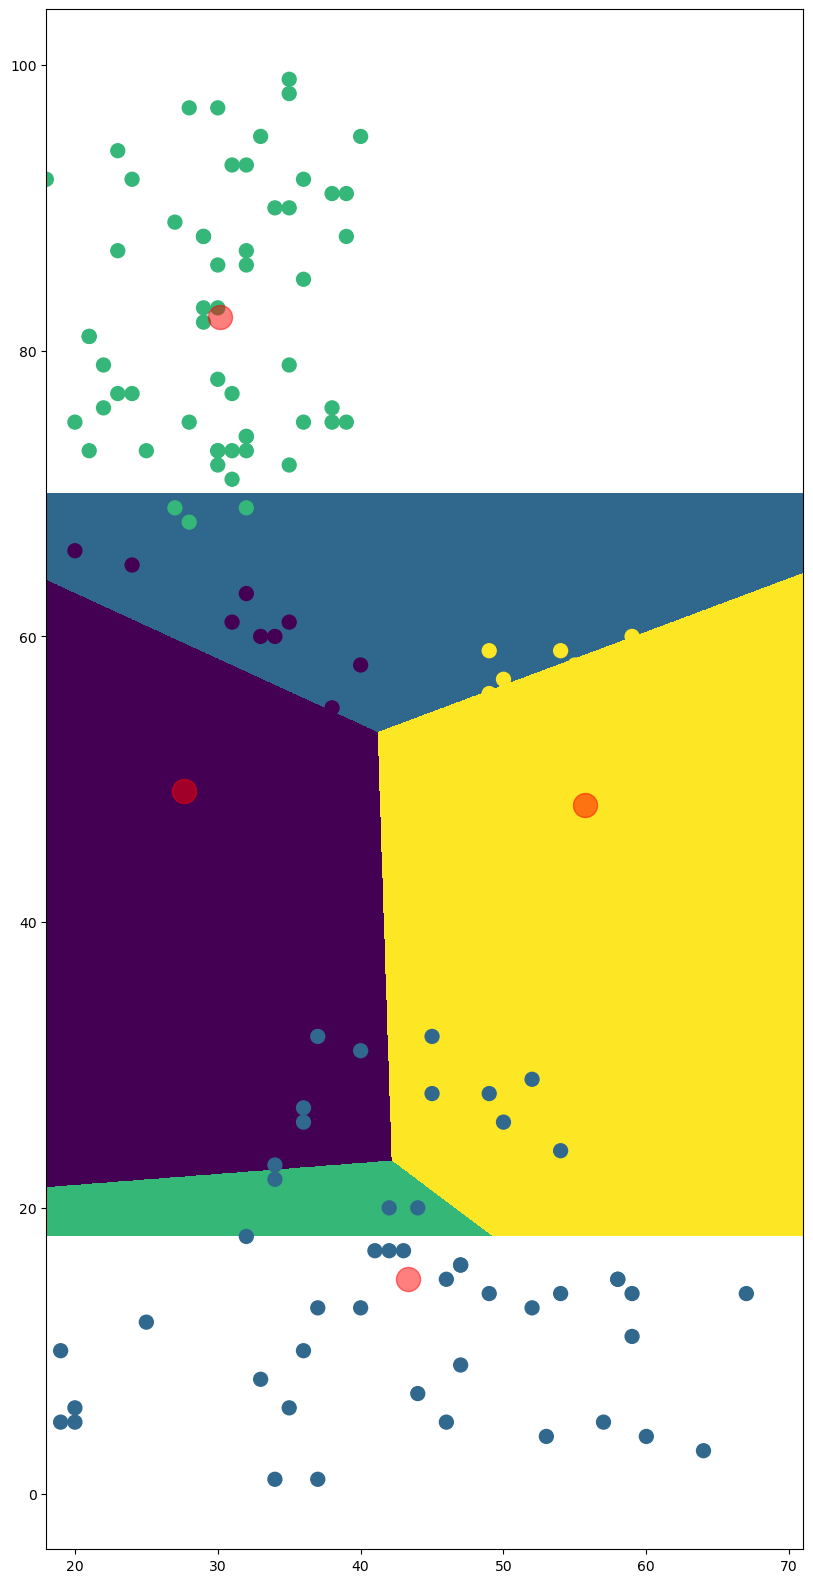

In [71]:
plt.figure(figsize=(15, 20))
plt.imshow(z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()))
plt.scatter(x='Age', y='Spending Score (1-100)', data=MallCustomers, c=labels, s=100)
plt.scatter(x=centroids[:, 0], y=centroids[:, 1], c='red', s=300, alpha=0.5)
plt.show()